In [2]:
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.insert(0, '../fem')
from ManufacturedSolutionsDarcy import *

In [3]:
dataset = MFSetDarcy(N_samples=1000, d=2, l_theta_min=0.4, l_theta_max=0.4, l_u_min=0.2, l_u_max=0.2)

In [4]:
X, Y = np.mgrid[0:1:100*1j, 0:1:100*1j]
x = np.vstack([X.ravel(), Y.ravel()]).T

In [5]:
u = dataset.u

In [6]:
us = []
for i in range(len(u)):
    us.append(u[i](x))
us = np.array(us)

In [7]:
U, Sigma, Vstar = np.linalg.svd(us)

In [8]:
Sigma

array([1.36310886e+01, 1.16068442e+01, 1.10959058e+01, 9.33014782e+00,
       8.31656716e+00, 7.99677523e+00, 6.72928055e+00, 6.29942942e+00,
       5.44032839e+00, 4.99608948e+00, 4.73226000e+00, 4.06037610e+00,
       3.87456074e+00, 2.89301325e+00, 2.78154818e+00, 2.73850031e+00,
       2.68452254e+00, 2.15461623e+00, 2.10035531e+00, 1.57353575e+00,
       1.46636284e+00, 1.32085223e+00, 1.29680707e+00, 1.27479580e+00,
       9.49395642e-01, 9.15859363e-01, 7.85192249e-01, 7.12254484e-01,
       5.93107844e-01, 5.61827131e-01, 4.98357331e-01, 4.72438314e-01,
       3.38699854e-01, 3.36914605e-01, 3.09691881e-01, 2.82936863e-01,
       2.70310217e-01, 1.90059142e-01, 1.84632644e-01, 1.42161020e-01,
       1.38386526e-01, 1.14110329e-01, 1.09562995e-01, 9.69371709e-02,
       9.08465505e-02, 8.79870352e-02, 8.38151526e-02, 4.97024340e-02,
       4.89249894e-02, 3.63931510e-02, 3.44697317e-02, 3.32238875e-02,
       3.23454933e-02, 2.99041737e-02, 2.33040685e-02, 2.24378538e-02,
      

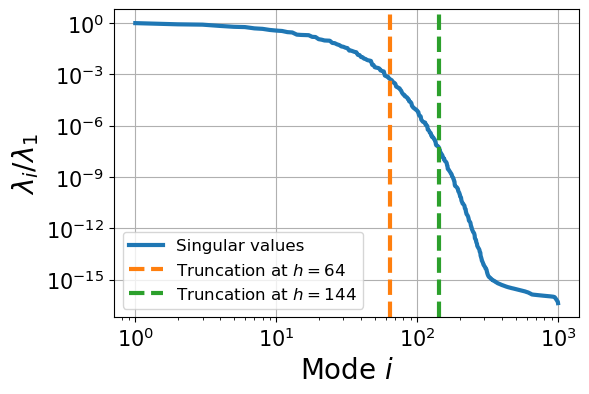

In [9]:
size_title = 25
size_ticklabels = 15
size_axeslabels = 20

fig, ax = plt.subplots(1,1, figsize=(6, 4))
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=0.4)

ax.plot(np.linspace(1,len(Sigma),len(Sigma)),Sigma/Sigma[0], linewidth=3, label='Singular values')
ax.axvline(64, 0, 1, linewidth=3, linestyle='--', label='Truncation at $h=64$', color='C1')
ax.axvline(144, 0, 1, linewidth=3, linestyle='--', label='Truncation at $h=144$', color='C2')
ax.tick_params(axis='both', labelsize=size_ticklabels)
ax.ticklabel_format(style='sci', scilimits=[-3,3])
ax.set_xlabel(r'Mode $i$', fontsize=size_axeslabels)
ax.set_ylabel(r'$\lambda_i/\lambda_1$', fontsize=size_axeslabels)
ax.set_xscale('log')
ax.set_yscale('log')
ax.legend(fontsize=12)
# ax.set_ylim(1e-6,1)
# ax.set_xlim(1,1e3)
ax.grid()

plt.savefig("eigenvaluedecay.svg", bbox_inches='tight')#, transparent=True)

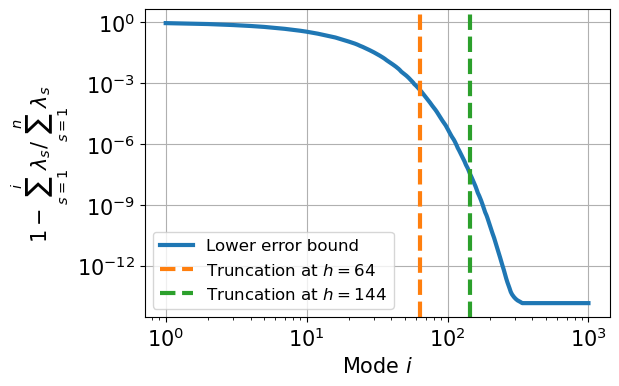

In [13]:
size_title = 25
size_ticklabels = 15
size_axeslabels = 15

fig, ax = plt.subplots(1,1, figsize=(6, 4))
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=0.4)

ax.plot(np.linspace(1,len(Sigma),len(Sigma)),1- np.cumsum(Sigma)/np.sum(Sigma), linewidth=3, label='Lower error bound')
ax.axvline(64, 0, 1, linewidth=3, linestyle='--', label='Truncation at $h=64$', color='C1')
ax.axvline(144, 0, 1, linewidth=3, linestyle='--', label='Truncation at $h=144$', color='C2')
ax.tick_params(axis='both', labelsize=size_ticklabels)
ax.ticklabel_format(style='sci', scilimits=[-3,3])
ax.set_xlabel(r'Mode $i$', fontsize=size_axeslabels)
ax.set_ylabel(r'$1- \sum_{s=1}^i\lambda_s/\sum_{s=1}^n\lambda_s$', fontsize=size_axeslabels)
ax.set_xscale('log')
ax.set_yscale('log')
# ax.set_ylim(1e-8,1)
# ax.set_xlim(1e0,1e3)
ax.legend(fontsize=12)
ax.grid()

plt.savefig("errorbound.svg", bbox_inches='tight')#, transparent=True)